In [182]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [183]:
import numpy as np
import pandas as pd

In [184]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [226]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, and_

In [186]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [187]:
# reflect an existing database into a new model


# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)

In [188]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [189]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [190]:
# Create our session (link) from Python to the DB

session = Session(engine)


In [191]:
first_row_st=session.query(Station).first()
first_row_st.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b8a0a794c0>,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

# Exploratory Climate Analysis

In [192]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)
prior_year=dt.date(2017,8,23) - dt.timedelta(days=365)
prior_year

sel = [Measurement.date, Measurement.prcp]

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores


query_last=session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > prior_year).all()
query_last





('2017-08-23',)


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [193]:
# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(query_last, columns=['date', 'prcp'])
df.set_index('date')


# Sort the dataframe by date

query_df=df.sort_values('date')
query_df

# Use Pandas Plotting with Matplotlib to plot the data


,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 [Text(-500.0, 0, '2017-05-27'),
  Text(0.0, 0, '2016-08-24'),
  Text(500.0, 0, '2016-11-10'),
  Text(1000.0, 0, '2017-01-29'),
  Text(1500.0, 0, '2017-04-19'),
  Text(2000.0, 0, '2017-07-11'),
  Text(2500.0, 0, '')])

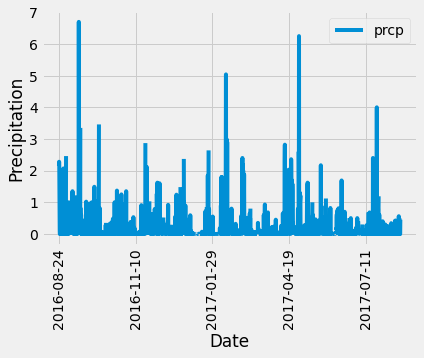

In [194]:
query_df.plot(x='date', y='prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.xticks(rotation=90)

In [195]:
# Use Pandas to calcualte the summary statistics for the precipitation data

query_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [196]:
# Design a query to show how many stations are available in this dataset?

num_stations=session.query(func.count(Station.station)).all()
num_stations

[(9)]

In [220]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

most_active=session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [221]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station=="USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

In [199]:
first_row_st=session.query(Station).first()
first_row_st.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b8a0a794c0>,
 'latitude': 21.2716,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [200]:
first_row_st=session.query(Measurement).first()
first_row_st.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b8a1e452b0>,
 'id': 1,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [201]:
# Choose the station with the highest number of temperature observations.
sel = [Measurement.tobs, Measurement.id, Measurement.station, Station.name]
same_station = session.query(*sel).filter(Measurement.station == Station.station).all()

station_df=pd.DataFrame(same_station)


station_counts = station_df["station"].value_counts()
station_counts

print(station_counts[station_counts == station_counts.max()])



USC00519281    2772
Name: station, dtype: int64


Text(0, 0.5, 'Frequency')

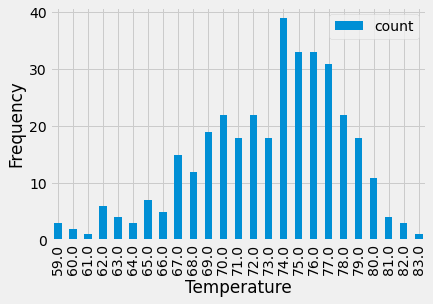

In [216]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs12=session.query(Measurement.tobs, func.count(Measurement.tobs)).filter(Measurement.station=="USC00519281").filter(Measurement.date >= prior_year).group_by(Measurement.tobs).all()
tobs12

tobsdf = pd.DataFrame(tobs12, columns=['tobs', 'count'])
tobsdf.set_index('tobs')


tobs_df=tobsdf.sort_values('tobs')
tobs_df


tobs_df.plot(kind='bar', x='tobs', y='count')
plt.xlabel("Temperature")
plt.ylabel("Frequency")



In [211]:
query_dates=query_df.date
query_prcp=query_df.prcp

datecip = list(zip(query_dates,query_prcp))
datecip


[('2016-08-24', 0.08),
 ('2016-08-24', nan),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-24', 1.22),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.11),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.01),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', nan),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.02),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.01),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.0),
 ('2016-08-29', nan),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.05),
 ('2016-08-30', 0.0),
 ('20

In [215]:
stations=session.query(Station).all()
stations

In [218]:
tobs52=session.query(Measurement.tobs, Measurement.date).filter(Measurement.station=="USC00519281").filter(Measurement.date >= prior_year).all()
tobs52


[(77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '20

In [227]:
start=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.date>="2016-09-20").all()

startend=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(and_(Measurement.date>="2016-09-20",Measurement.date<="2016-09-27" )).all()
startend

[(70.0, 83.0, 77.76923076923077)]

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
